<font size = 6>
Лабораторная работа "Подбор модельного распределения"

Выполнил - Карабалин Руслан, ММБ-104-О-02

Цель работы - подобрать подходящее модельное распределение для переменной
характеристики генеральной совокупности.

# Введение

Импортируем таблицу и выведем первые 6 строк

In [2]:
ds0 <- read.csv("AD.ds2.csv")
head(ds0)

,v01,v02,v03,v04,v05,v06,v07,v08,v09,v10,⋯,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.040774e+04,1.1177483,2.08716418,-0.2854621,1.1770627,1.5453010,0.36143156,-2.1779393,1.226519693,0.002768399,⋯,0.42524817,-2.712991,1.4693547,1.05152905,6.181462e+05,1.1591913,0.46744084,-0.005435626,1.4824048,0.1202997
2,2.338341e-03,-1.0624333,0.01208505,-0.2151219,0.5830625,2.3845005,0.02084804,0.1897531,0.559229566,0.285363958,⋯,0.05634086,2.745203,0.5823229,0.03269495,6.608826e-07,-1.2690915,0.01987355,1.131234103,0.8279954,1.3141109
3,2.169020e+02,0.3070796,0.31851224,2.0991272,0.8717289,0.7209684,0.63766681,-2.5975247,0.002256652,-0.992388443,⋯,1.67454842,1.394396,4.5995074,1.24478272,2.453820e+06,-0.2901401,0.14523402,-1.122247104,0.0500437,2.4538538
4,1.807186e-02,0.9583696,1.53999689,2.5137363,2.1745342,-1.0336654,0.41336919,2.1197162,0.078316850,-2.883248946,⋯,0.21375903,0.641654,0.2537848,0.52810417,2.161011e-04,-0.4582640,0.17604184,0.986162300,0.4901777,1.6696506
5,1.298530e-03,0.9833965,0.39922073,-2.3146484,1.2151992,-0.3516427,0.25961265,2.1458442,0.666594523,2.371036387,⋯,0.29032045,3.482045,0.8305796,0.80275135,3.907556e+07,-0.5288283,0.08427564,1.331548053,2.7894957,1.6734540
6,1.943109e-07,0.4397139,1.92952758,-0.5002607,1.3193317,0.3099350,0.41391248,2.3464658,0.229870063,-0.226536190,⋯,0.04189588,-1.917779,0.5248991,-1.72274173,1.260393e-01,1.8109776,0.24697459,0.395608142,0.3579788,0.3452789


Подключим библиотеку dplyr, при помощи функции select из этого пакета создадим отдельную таблицу на основе столбца, соответствующего варианту

In [3]:
library(dplyr)

ds288 <- select(ds0, contains("v88"))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Переименуем в полученной таблице столбец "v88" на "s88"

In [4]:
colnames(ds288) <- gsub("v", "s", colnames(ds288))

Подключим пакет fitdistrplus:

In [5]:
install.packages("fitdistrplus")
library(fitdistrplus)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: survival



# Выбор подходящих распределений

## Бета-распределение


Получим оценки параметров бета-распределения и построим:

1. Диаграмму сравнения гистограммы выборки и плотности бета-распределения.

2. Диаграмму сравнения эмпирической функции распределения и функции распределения бета-распределения.

3. Q-Q график для сравнения квантилей выборки с квантилями бета-распределения.

4. P-P график для сравнения вероятностей выборки с вероятностями бета-распределения.

In [ ]:
beta_fit <- fitdist(ds288$s88, "beta")
plot(beta_fit)

Error in computing default starting values.


ERROR: Error in manageparam(start.arg = start, fix.arg = fix.arg, obs = data, : Error in startargdefault(obs, distname) : 
  values must be in [0-1] to fit a beta distribution



Бета-распределение не подходит для описания исследуемого признака генеральной совокупности, так как в выборке присутствуют значения не из отрезка [0, 1].

<!-- На диаграмме кривая плотности бета-распределения близка к огибающей гистограммы выборки. Бета распределение подходит для описания исследуемого признака генеральной совокупности.

На диаграмме  кривая эмпирической функции распределения близка к кривой функции распределения бета-распределения.  Бета распределение подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек выстраиваются вдоль биссектрисы, поэтому можно сделать вывод, что большая часть выборочных квантилей близка к квантилям бета распределения. Бета распределение подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек выстраиваются вдоль биссектрисы, поэтому можно сделать вывод, что большая часть выборочных процентилей близка к процентилям бета распределения. Бета распределение подходит для описания исследуемого признака генеральной совокупности.

Таким образом, бета-распределение *возможно* подходит для описания исследуемого признака генеральной совокупности. -->

## Экспоненциальное

Получим оценки параметров экспоненциального распределения и построим:
- Диаграмму сравнения гистограммы выборки и плотности экспоненциального распределения.
- Диаграмму сравнения эмпирической функции распределения и функции распределения экспоненциального распределения.
- Q-Q график для сравнения квантилей выборки с квантилями экспоненциального распределения.
- P-P график для сравнения вероятностей выборки с вероятностями экспоненциального распределения.


In [ ]:
exp_fit <- fitdist(ds288$s88, "exp")
plot(exp_fit)

Error in computing default starting values.


ERROR: Error in manageparam(start.arg = start, fix.arg = fix.arg, obs = data, : Error in startarg_transgamma_family(x, distr) : 
  values must be positive to fit an exponential distribution



<!-- На диаграмме кривая плотности экспоненциального распределения не близка к огибающей гистограммы выборки. Экспоненциальное распределение не подходит для описания исследуемого признака генеральной совокупности.

На диаграмме  кривая эмпирической функции распределения не близка к кривой функции распределения экспоненциального распределения.  Экспоненциальное распределение подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек отклоняются от биссектрисы, поэтому можно сделать вывод, что большая часть выборочных квантилей отличается от квантилей экспоненциального распределения. Экспоненциальное распределение не подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек отклоняются от биссектрисы, поэтому можно сделать вывод, что большая часть выборочных процентилей отличается от процентилей экспоненциального распределения. Экспоненциальное распределение не подходит для описания исследуемого признака генеральной совокупности.

Таким образом, экспоненциальное распределение не подходит для описания исследуемого признака генеральной совокупности. -->

Экспоненциальное распределение не подходит для описания исследуемого признака генеральной совокупности, так как в выборке присутствуют отрицательные значения

## Гамма-распределение


Получим оценки параметров гамма-распределения и построим:
- Диаграмму сравнения гистограммы выборки и плотности гамма-распределения.
- Диаграмму сравнения эмпирической функции распределения и функции распределения гамма-распределения.
- Q-Q график для сравнения квантилей выборки с квантилями гамма-распределения.
- P-P график для сравнения вероятностей выборки с вероятностями гамма-распределения.


In [ ]:
gamma_fit <- fitdist(ds288$s88, "gamma")
plot(gamma_fit)

Error in computing default starting values.


ERROR: Error in manageparam(start.arg = start, fix.arg = fix.arg, obs = data, : Error in startarg_transgamma_family(x, distr) : 
  values must be positive to fit a gamma distribution



<!-- На диаграмме кривая плотности гамма-распределения близка к огибающей гистограммы выборки. Гамма-распределение подходит для описания исследуемого признака генеральной совокупности.

На диаграмме  кривая эмпирической функции распределения близка к кривой функции распределения гамма-распределения.  Гамма-распределение подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек выстраиваются вдоль биссектрисы, поэтому можно сделать вывод, что большая часть выборочных квантилей близка к квантилям гамма распределения. Гамма-распределение подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек выстраиваются вдоль биссектрисы, поэтому можно сделать вывод, что большая часть выборочных процентилей близка к процентилям гамма распределения. Гамма-распределение подходит для описания исследуемого признака генеральной совокупности.

Таким образом, гамма-распределение, *возможно*, подходит для описания исследуемого признака генеральной совокупности. -->

Гамма-распределение не подходит для описания исследуемого признака генеральной совокупности, так как в выборке присутствуют отрицательные значения.

## Распределение Коши

Получим оценки параметров распределения Коши и построим:
- Диаграмму сравнения гистограммы выборки и плотности распределения Коши.
- Диаграмму сравнения эмпирической функции распределения и функции распределения Коши.
- Q-Q график для сравнения квантилей выборки с квантилями распределения Коши.
- P-P график для сравнения вероятностей выборки с вероятностями распределения Коши.


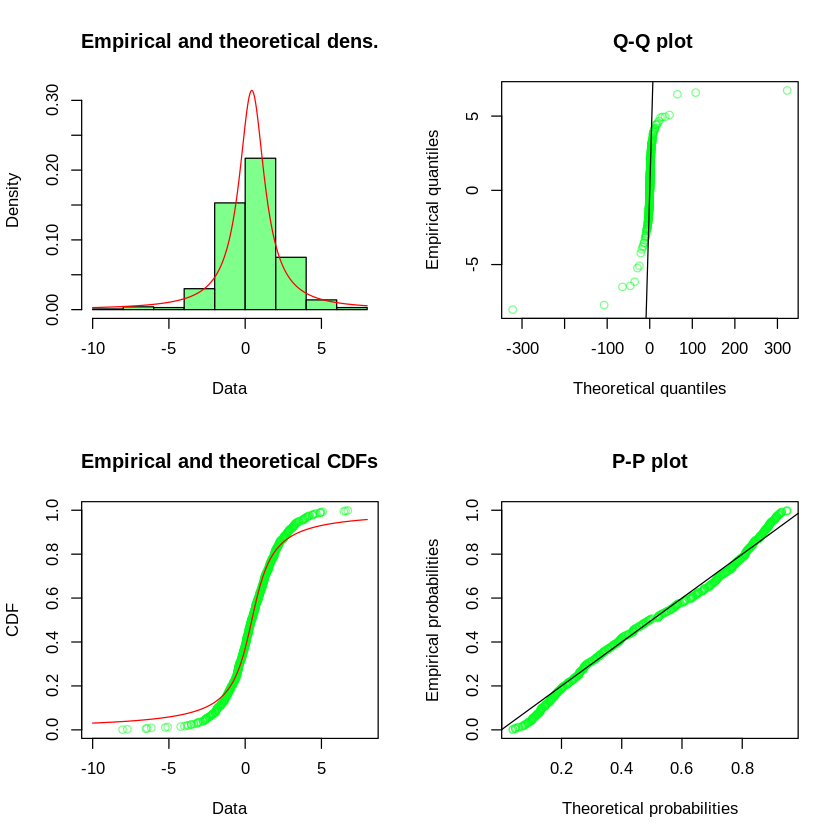

In [14]:
cauchy_fit <- fitdist(ds288$s88, "cauchy")
plot(cauchy_fit, col=rgb(0, 1, 0.1, 0.5))

На диаграмме кривая плотности распределения Коши не близка к огибающей гистограммы выборки. Распределение Коши не подходит для описания исследуемого признака генеральной совокупности.

На диаграмме  кривая эмпирической функции распределения не близка к кривой функции распределения Коши.  Распределение Коши не подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек не выстраиваются вдоль биссектрисы, поэтому можно сделать вывод, что большая часть выборочных квантилей не близка к квантилям распределения Коши. Распределение Коши не подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек не выстраиваются вдоль биссектрисы первого координатного угла, поэтому можно сделать вывод, что большая часть выборочных процентилей близка к процентилям распределения Коши. Распределение Коши не подходит для описания исследуемого признака генеральной совокупности.

Таким образом, распределение Коши не подходит для описания исследуемого признака генеральной совокупности.

## Логистическое

Получим оценки параметров логистического распределения и построим:
- Диаграмму сравнения гистограммы выборки и плотности логистического распределения.
- Диаграмму сравнения эмпирической функции распределения и функции распределения логистического распределения.
- Q-Q график для сравнения квантилей выборки с квантилями логистического распределения.
- P-P график для сравнения вероятностей выборки с вероятностями логистического распределения.


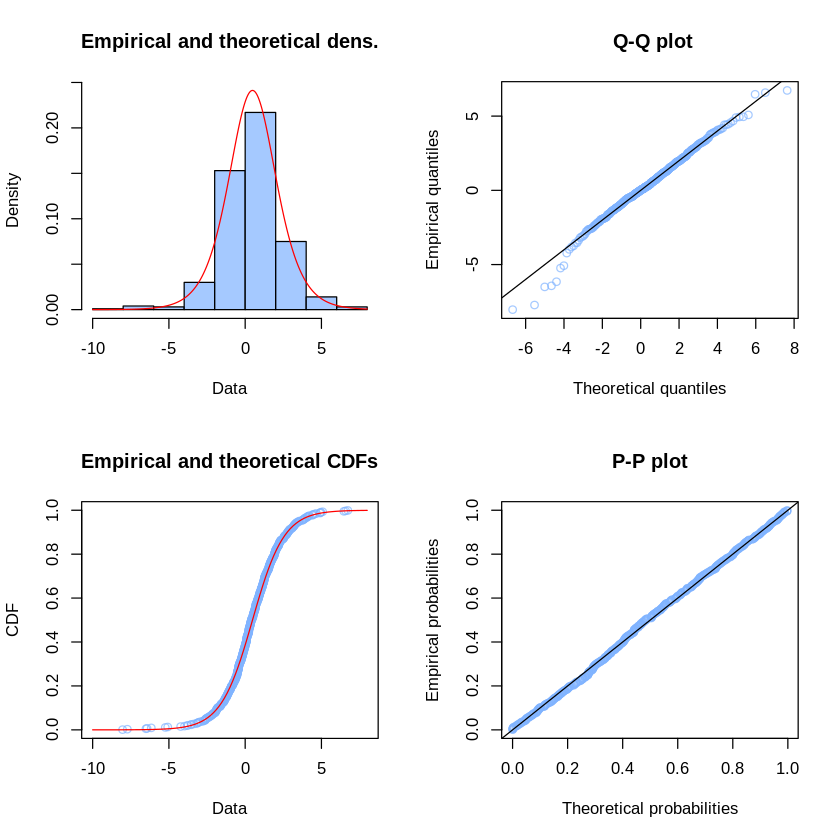

In [17]:
logis_fit <- fitdist(ds288$s88, "logis")
plot(logis_fit, col=rgb(0.5, 0.7, 1, 0.7))

На диаграмме кривая плотности логистического распределения близка к огибающей гистограммы выборки. Логистическое распределение подходит для описания исследуемого признака генеральной совокупности.

На диаграмме  кривая эмпирической функции распределения близка к кривой функции распределения логистического распределения.  Логистическое распределение подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек выстраиваются вдоль биссектрисы первого координатного угла, поэтому можно сделать вывод, что большая часть выборочных квантилей близка к квантилям логистического распределения. Логистическое распределение подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек выстраиваются вдоль биссектрисы первого координатного угла, поэтому можно сделать вывод, что большая часть выборочных процентилей близка к процентилям логистического распределения. Логистическое распределение подходит для описания исследуемого признака генеральной совокупности.

Таким образом, логистическое распределение подходит для описания исследуемого признака генеральной совокупности.

## Логнормальное

Получим оценки параметров логнормального распределения и построим:
- Диаграмму сравнения гистограммы выборки и плотности логнормального распределения.
- Диаграмму сравнения эмпирической функции распределения и функции распределения логнормального распределения.
- Q-Q график для сравнения квантилей выборки с квантилями логнормального распределения.
- P-P график для сравнения вероятностей выборки с вероятностями логнормального распределения.


In [ ]:
lnorm_fit <- fitdist(ds288$s88, "lnorm")
plot(lnorm_fit)

Error in computing default starting values.


ERROR: Error in manageparam(start.arg = start, fix.arg = fix.arg, obs = data, : Error in startargdefault(obs, distname) : 
  values must be positive to fit a lognormal distribution



<!-- На диаграмме кривая плотности логнормального распределения не близка к огибающей гистограммы выборки. Логистическое распределение не подходит для описания исследуемого признака генеральной совокупности.

На диаграмме  кривая эмпирической функции распределения близка к кривой функции распределения логнормального распределения.  Логистическое распределение подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек отклоняются от биссектрисы, поэтому можно сделать вывод, что большая часть выборочных квантилей отличается от квантилей логнормального распределения. Логнормальное распределение не подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек отклоняется от биссектрисы, поэтому можно сделать вывод, что большая часть выборочных процентилей отличается от процентилей логнормального распределения. Логнормальное распределение подходит для описания исследуемого признака генеральной совокупности.

Таким образом, логнормальное распределение не подходит для описания исследуемого признака генеральной совокупности. -->

Логнормальное распределение не подходит для описания исследуемого признака генеральной совокупности, так как в выборке присутствуют отрицательные значения.

## Нормальное


Получим оценки параметров нормального распределения и построим:
- Диаграмму сравнения гистограммы выборки и плотности нормального распределения.
- Диаграмму сравнения эмпирической функции распределения и функции распределения нормального распределения.
- Q-Q график для сравнения квантилей выборки с квантилями нормального распределения.
- P-P график для сравнения вероятностей выборки с вероятностями нормального распределения.


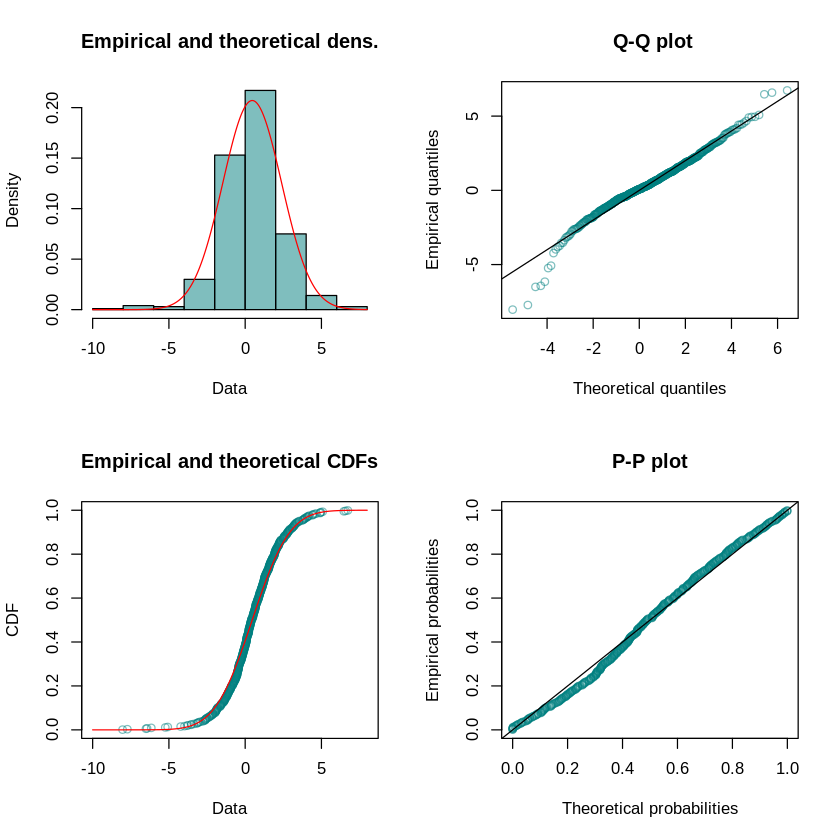

In [10]:
norm_fit <- fitdist(ds288$s88, "norm")
plot(norm_fit, col=rgb(0, 0.5, 0.5, 0.5))

На диаграмме кривая плотности нормального распределения близка к огибающей гистограммы выборки. Нормальное распределение подходит для описания исследуемого признака генеральной совокупности.

На диаграмме  кривая эмпирической функции распределения близка к кривой функции распределения нормального распределения.  Нормальное распределение подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек выстраиваются вдоль биссектрисы первого координатного угла, поэтому можно сделать вывод, что большая часть выборочных квантилей близка к квантилям нормального распределения. Нормальное распределение подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек выстраиваются вдоль биссектрисы первого координатного угла, поэтому можно сделать вывод, что большая часть выборочных процентилей близка к процентилям нормального распределения. Нормальное распределение подходит для описания исследуемого признака генеральной совокупности.

Таким образом, нормальное распределение подходит для описания исследуемого признака генеральной совокупности.

## Распределение Вейбулла

Получим оценки параметров распределения Вейбулла и построим:
- Диаграмму сравнения гистограммы выборки и плотности распределения Вейбулла.
- Диаграмму сравнения эмпирической функции распределения и функции распределения Вейбулла.
- Q-Q график для сравнения квантилей выборки с квантилями распределения Вейбулла.
- P-P график для сравнения вероятностей выборки с вероятностями распределения Вейбулла.


In [ ]:
weibull_fit <- fitdist(ds288$s88, "weibull")
plot(weibull_fit)

Error in computing default starting values.


ERROR: Error in manageparam(start.arg = start, fix.arg = fix.arg, obs = data, : Error in startarg_transgamma_family(x, distr) : 
  values must be positive to fit a Weibull distribution



<!-- На диаграмме кривая плотности распределения Вейбулла близка к огибающей гистограммы выборки. Распределение Вейбулла подходит для описания исследуемого признака генеральной совокупности.


На диаграмме  кривая эмпирической функции распределения близка к кривой функции распределения Вейбулла.  Распределение Вейбулла подходит для описания исследуемого признака генеральной совокупности.


На диаграмме большинство точек выстраиваются вдоль биссектрисы, поэтому можно сделать вывод, что большая часть выборочных квантилей близка к квантилям  распределения Вейбулла. Распределение Вейбулла подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек выстраиваются вдоль биссектрисы, поэтому можно сделать вывод, что большая часть выборочных процентилей близка к процентилям  распределения Вейбулла. Распределение Вейбулла подходит для описания исследуемого признака генеральной совокупности.
Таким образом, распределение Вейбулла подходит для описания исследуемого признака генеральной совокупности. -->

Распределение Вейбулла не подходит для описания исследуемого признака генеральной совокупности, так как в выборке присутствуют отрицательные значения

## Равномерное

Получим оценки параметров равномерного распределения и построим:
- Диаграмму сравнения гистограммы выборки и плотности равномерного распределения.
- Диаграмму сравнения эмпирической функции распределения и функции распределения равномерного распределения.
- Q-Q график для сравнения квантилей выборки с квантилями равномерного распределения.
- P-P график для сравнения вероятностей выборки с вероятностями равномерного распределения.


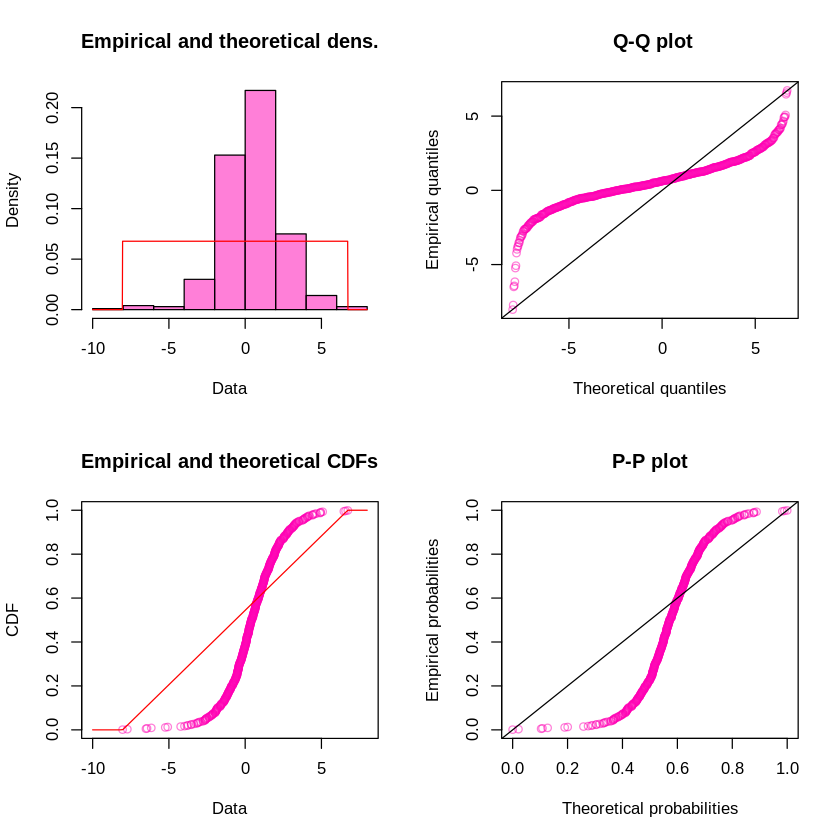

In [15]:
unif_fit <- fitdist(ds288$s88, "unif")
plot(unif_fit, col=rgb(1, 0, 0.7, 0.5))

На диаграмме кривая плотности равномерного распределения не близка к огибающей гистограммы выборки. Равномерное распределение не подходит для описания исследуемого признака генеральной совокупности.

На диаграмме  кривая эмпирической функции распределения не близка к кривой функции распределения равномерного распределения.  Равномерное распределение подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек отклоняются от биссектрисы первого координатного угла, поэтому можно сделать вывод, что большая часть выборочных квантилей отличается от квантилей равномерного распределения. Равномерное распределение не подходит для описания исследуемого признака генеральной совокупности.

На диаграмме большинство точек отклоняются от биссектрисы первого координатного угла, поэтому можно сделать вывод, что большая часть выборочных процентилей отличается от процентилей равномерного распределения. Равномерное распределение не подходит для описания исследуемого признака генеральной совокупности.

Таким образом, равномерное распределение не подходит для описания исследуемого признака генеральной совокупности.

Таким образом, подходящими распределениями являются:


1. Логистическое;
2. Нормальное;



# Проверка распределений с помощью теста

Выведем параметры логистического распределения:

In [ ]:
logis_fit

Fitting of the distribution ' logis ' by maximum likelihood 
Parameters:
          estimate Std. Error
location 0.4809273 0.07983674
scale    1.0363783 0.03895542

Проверим гипотезу о логистическом распределении при 5%-ом уровне значимости для генеральной совокупности, представленной соответствующей выборкой тестом Колмогорова-Смирнова:

In [ ]:
ks.test(ds288$s88, "plogis", location=logis_fit$estimate["location"], scale=logis_fit$estimate["scale"])


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  ds288$s88
D = 0.025122, p-value = 0.9105
alternative hypothesis: two-sided


p-значение (pvalue) больше уровня значимости 0,05, поэтому гипотеза о логистическом распределении исследуемого признака генеральной совокупности не отвергается

Выведем параметры нормального распределения:

In [ ]:
norm_fit

Fitting of the distribution ' norm ' by maximum likelihood 
Parameters:
      estimate Std. Error
mean 0.4618186 0.08618228
sd   1.9270944 0.06094000

Проверим гипотезу о нормальном распределении при 5%-ом уровне значимости для генеральной совокупности, представленной соответствующей выборкой тестом Колмогорова-Смирнова:

In [ ]:
ks.test(ds288$s88, "pnorm", mean=norm_fit$estimate["mean"], sd=norm_fit$estimate["sd"])


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  ds288$s88
D = 0.055254, p-value = 0.09443
alternative hypothesis: two-sided


p-значение (pvalue) больше уровня значимости 0,05, поэтому гипотеза о нормальном распределении исследуемого признака генеральной совокупности не отвергается

Таким образом, не отвергаются гипотеза о том, что генеральная совокупность имеет логистическое распределение и гипотеза о нормальном распределении

# Заключение

В ходе работы были проанализированы диаграммы сравнения гистограммы и кривой теоретического распределения, диаграммы сравнения кривых плотностей эмпирического и теоретического распределений, графики q-q (квантиль-квантиль) и графики p-p (процентиль-процентиль). По выводам из данных диаграмм были отброшены гамма-распределение, бета-распределение, экспоненциальное, логнормальное, равномерное распределения, распределение Коши и Вейбулла. Остались:

1. Логистическое;
2. Нормальное;

Для оставшихся распределений - для проверки был использован тест Колмогорова-Смирнова с уровнем значимости 0,05.

При помощи этого теста не были отвергнуты гипотезы о том, что генеральная совокупность имеет логистическое распределение и гипотеза о нормальном распределении.

Итого, подходящими модельными распределениями являются логистическое распределение с параметрами (0,4809273, 1,0363783), нормальное c параметрами (0,4618186, 1,9270944).